In [101]:
import numpy as np

import requests
from bs4 import BeautifulSoup
from PIL import Image
from io import BytesIO

import matplotlib.pyplot as plt
import seaborn as sns
import colorsys

In [136]:
URL = 'https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population'
page = requests.get(URL)
soup = BeautifulSoup(page.content, 'html.parser')

# Obtaining the product names
images = soup.find_all('img', class_='thumbborder')

In [69]:
URL = 'https://en.wikipedia.org/wiki/Gallery_of_sovereign_state_flags'
page = requests.get(URL)
soup = BeautifulSoup(page.content, 'html.parser')

# Obtaining the product names
images = soup.find_all('a', class_='image')

In [141]:
images[1]

<img alt="" class="thumbborder" data-file-height="900" data-file-width="1350" decoding="async" height="15" src="//upload.wikimedia.org/wikipedia/en/thumb/4/41/Flag_of_India.svg/23px-Flag_of_India.svg.png" srcset="//upload.wikimedia.org/wikipedia/en/thumb/4/41/Flag_of_India.svg/35px-Flag_of_India.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/4/41/Flag_of_India.svg/45px-Flag_of_India.svg.png 2x" width="23"/>

In [139]:
RGB_images = []

for k in range(len(images)):
    img = str(images[k])
    pos1 = img.find("src=")
    pos2 = img.find("svg.png")
    url = img[pos1+7:pos2+7]

    response = requests.get('http://' + url)
    img = Image.open(BytesIO(response.content))
    rgb_im = img.convert('RGB')
    width, height = rgb_im.size
    RGB_colors = np.empty((width, height, 3))
    for i in range(width):
        for j in range(height):
            RGB_colors[i, j, 0], RGB_colors[i, j, 1], RGB_colors[i, j, 2] = rgb_im.getpixel((i, j))
    RGB_images.append(RGB_colors)

In [140]:
img

In [118]:
wavelengths = []

for image in RGB_images:
    
    mean_color = np.mean(np.mean(image, axis=1), axis=0)
 
    hue = colorsys.rgb_to_hls(mean_color[0], mean_color[1], mean_color[2])
    wavelengths.append(620 - 170 * hue[0])

(array([ 7., 12.,  4.,  4.,  6.,  3.,  3.,  3.,  3.,  1.,  0.,  1.,  1.,
         2.,  2.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  4.,
         3.,  5.,  1.,  3.,  3.,  1.,  3.,  1.,  2.,  1.,  0.,  1.,  0.,
         3.,  0.,  0.,  3.,  3.,  1.,  1.,  3.,  0.,  2.,  0.,  1.,  0.,
         1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  3.,
         0.,  2.,  1.,  1.,  1.,  1.,  1.,  1.,  7.,  8.,  6.,  3.,  3.,
         8.,  3.,  3.,  7.,  1.,  0.,  5.,  5.,  9.]),
 array([450.24078761, 451.93837973, 453.63597186, 455.33356398,
        457.0311561 , 458.72874823, 460.42634035, 462.12393248,
        463.8215246 , 465.51911672, 467.21670885, 468.91430097,
        470.61189309, 472.30948522, 474.00707734, 475.70466947,
        477.40226159, 479.09985371, 480.79744584, 482.49503796,
        484.19263009, 485.89022221, 487.58781433, 489.28540646,
        490.98299858, 492.68059071, 494.37818283, 

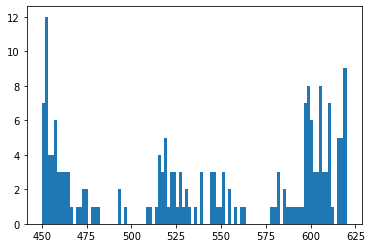

In [120]:
plt.hist(wavelengths, bins=100)

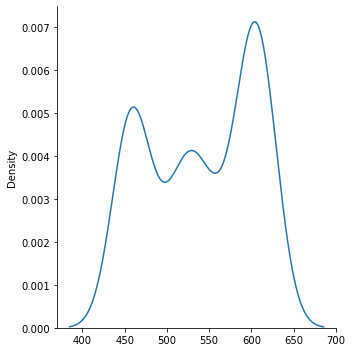

In [124]:
sns.displot(data=wavelengths, kind="kde")# x="flipper_length_mm", hue="species", multiple="stack", kind="kde")

C:\Users\Fabio\Anaconda3\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.01 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

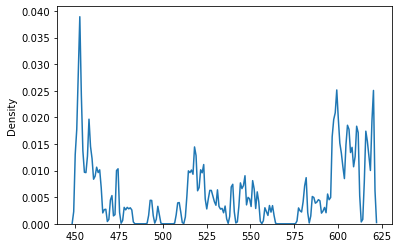

In [131]:
sns.kdeplot(data=wavelengths, bw=0.01)

C:\Users\Fabio\Anaconda3\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

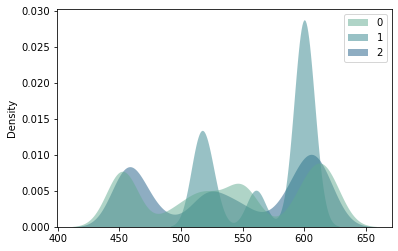

In [155]:
sns.kdeplot(
   data=[wavelengths[:20], wavelengths[20:30], wavelengths[30:]],#, x="total_bill", hue="size",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0, bw=0.2
)